In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df=pd.read_csv("diabetes.csv")

In [61]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [62]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [63]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [64]:
from sklearn.model_selection import train_test_split as tt
from sklearn.preprocessing import StandardScaler

In [65]:
x=df.drop(columns="Outcome")

In [66]:
y=df['Outcome']

In [67]:
x_train,x_test,y_train,y_test = tt(x,y,test_size=.3)

In [68]:
scaler=StandardScaler()

In [69]:
x_train_sc=scaler.fit_transform(x_train)

In [70]:
x_test_sc=scaler.fit_transform(x_test)

In [71]:
from sklearn.neighbors import KNeighborsClassifier as k

In [72]:
error=[]
for i in range(1,40):
    knn=k(n_neighbors=i)
    knn.fit(x_train_sc,y_train)
    pred=knn.predict(x_test_sc)
    error.append(np.mean(pred!=y_test))

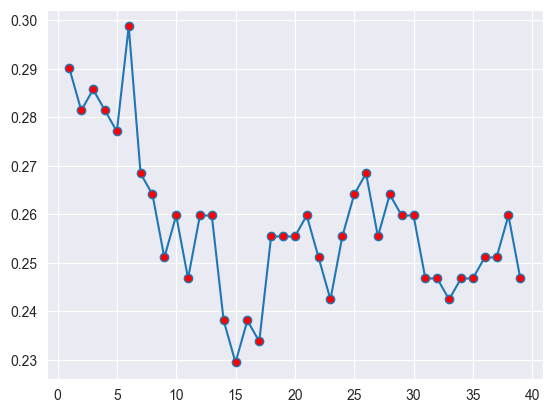

In [73]:
plt.plot(range(1,40),error,marker="o",markerfacecolor="r")

In [74]:
knn=k(n_neighbors=15)
knn.fit(x_train_sc,y_train)
y_pred=knn.predict(x_test_sc)

In [75]:
from sklearn.metrics import confusion_matrix,classification_report

In [76]:
print(confusion_matrix(y_test,y_pred))

[[137  10]
 [ 43  41]]


In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       147
           1       0.80      0.49      0.61        84

    accuracy                           0.77       231
   macro avg       0.78      0.71      0.72       231
weighted avg       0.78      0.77      0.75       231
